### Ventas de Adidas en Estados Unidos

# <img src="https://upload.wikimedia.org/wikipedia/commons/2/24/Adidas_logo.png" width="150">


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sagarmorework/adidas-us-sales")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sagarmorework/adidas-us-sales/versions/1


In [ ]:
import kagglehub
import os

# Descargar dataset de Kaggle
dataset_path = kagglehub.dataset_download("sagarmorework/adidas-us-sales")

# Verificar si la carpeta existe
print("Ruta del dataset:", dataset_path)
print("Archivos en la carpeta:", os.listdir(dataset_path))


Ruta del dataset: /root/.cache/kagglehub/datasets/sagarmorework/adidas-us-sales/versions/1
Archivos en la carpeta: ['Adidas US Sales.csv']


In [ ]:
import pandas as pd
import os

# Ruta correcta al archivo CSV
dataset_path = "/root/.cache/kagglehub/datasets/sagarmorework/adidas-us-sales/versions/1"
file_name = "Adidas US Sales.csv"

# Cargar el dataset en un DataFrame
df = pd.read_csv(os.path.join(dataset_path, file_name))

# Mostrar las primeras filas
df.head()


,sales_id,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method
0,1,Foot Locker,1185732,2021-11-06,Southeast,South Carolina,Charleston,Men's Street Footwear,50,278,13900,792,Online
1,2,Foot Locker,1185732,2020-03-14,Northeast,New York,New York,Men's Apparel,46,278,12788,435,Outlet
2,3,West Gear,1128299,2021-01-19,West,California,San Francisco,Men's Athletic Footwear,47,278,13066,287,Outlet
3,4,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,103,218,22454,1257,Online
4,5,Sports Direct,1197831,2021-09-14,South,Alabama,Birmingham,Women's Street Footwear,36,278,10008,530,Outlet


In [ ]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9637 entries, 0 to 9636
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_id          9637 non-null   int64 
 1   retailer          9637 non-null   object
 2   retailer_id       9637 non-null   int64 
 3   invoice_date      9637 non-null   object
 4   region            9637 non-null   object
 5   state             9637 non-null   object
 6   city              9637 non-null   object
 7   product           9637 non-null   object
 8   price_per_unit    9637 non-null   int64 
 9   units_sold        9637 non-null   int64 
 10  total_sales       9637 non-null   int64 
 11  operating_profit  9637 non-null   int64 
 12  sales_method      9637 non-null   object
dtypes: int64(6), object(7)
memory usage: 978.9+ KB


In [ ]:
# Estadísticas descriptivas
df.describe()


,sales_id,retailer_id,price_per_unit,units_sold,total_sales,operating_profit
count,9637.000000,9.637000e+03,9637.000000,9637.000000,9637.000000,9637.000000
mean,4819.000000,1.173846e+06,45.218948,256.886064,12451.621355,3440.706029
std,2782.106606,2.636304e+04,14.704520,214.097600,12708.094249,5418.210200
min,1.000000,1.128299e+06,7.000000,6.000000,160.000000,8.000000
25%,2410.000000,1.185732e+06,35.000000,106.000000,4068.000000,192.000000
50%,4819.000000,1.185732e+06,45.000000,176.000000,7805.000000,437.000000
75%,7228.000000,1.185732e+06,55.000000,350.000000,15834.000000,5200.000000
max,9637.000000,1.197831e+06,110.000000,1275.000000,82500.000000,39000.000000


In [ ]:
# Contar valores nulos en cada columna
df.isnull().sum()


,0
sales_id,0
retailer,0
retailer_id,0
invoice_date,0
region,0
state,0
city,0
product,0
price_per_unit,0
units_sold,0


In [ ]:
df.interpolate(inplace=True)


<ipython-input-18-2010a25cae31>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(inplace=True)


In [ ]:
print(df.columns)


Index(['sales_id', 'retailer', 'retailer_id', 'invoice_date', 'region',
       'state', 'city', 'product', 'price_per_unit', 'units_sold',
       'total_sales', 'operating_profit', 'sales_method'],
      dtype='object')


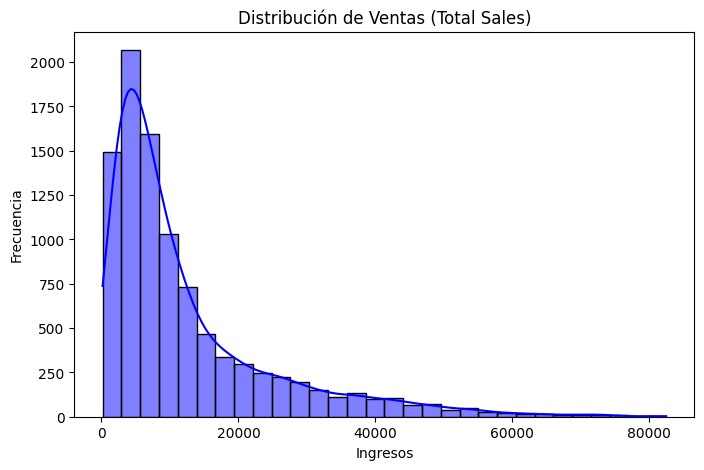

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Revisar la Distribución de Ventas
plt.figure(figsize=(8,5))
sns.histplot(df["total_sales"], bins=30, kde=True, color="blue")
plt.title("Distribución de Ventas (Total Sales)")
plt.xlabel("Ingresos")
plt.ylabel("Frecuencia")
plt.show()


<ipython-input-24-0f646f195f8f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product", y="total_sales", data=df_category, palette="viridis")


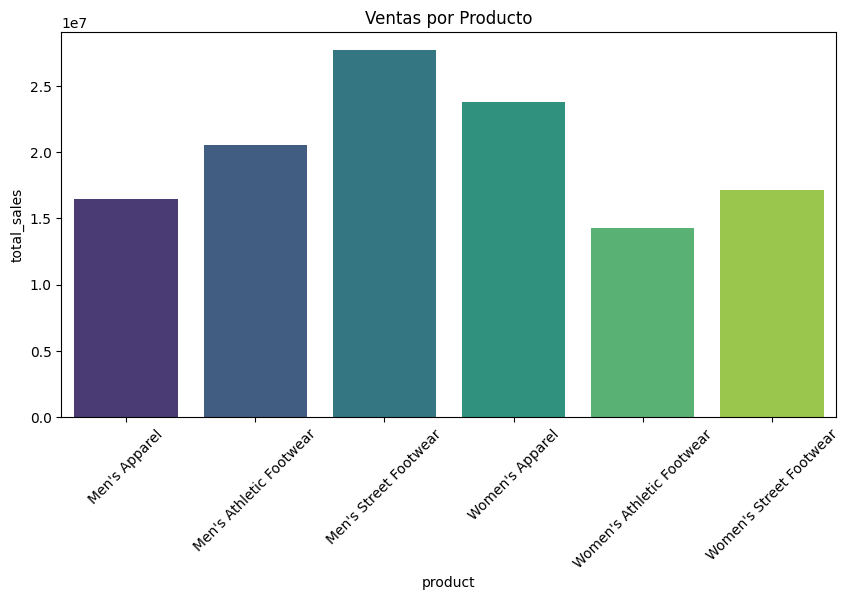

In [ ]:
#Ventas por Categoría de Producto
df_category = df.groupby("product")["total_sales"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x="product", y="total_sales", data=df_category, palette="viridis")
plt.xticks(rotation=45)
plt.title("Ventas por Producto")
plt.show()


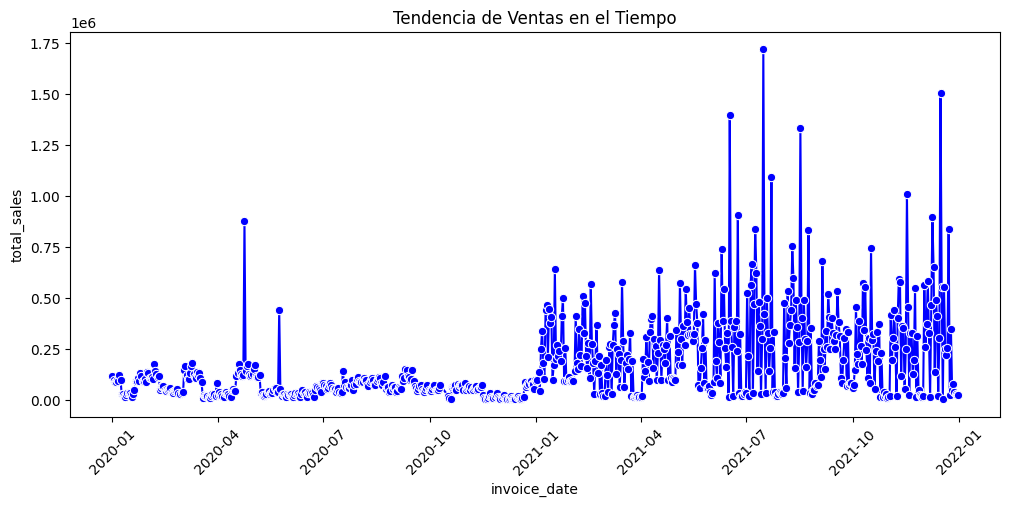

In [ ]:
#Tendencia de Ventas en el Tiempo
df["invoice_date"] = pd.to_datetime(df["invoice_date"])  # Convertir a formato de fecha
df_time = df.groupby("invoice_date")["total_sales"].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(x="invoice_date", y="total_sales", data=df_time, marker="o", color="b")
plt.title("Tendencia de Ventas en el Tiempo")
plt.xticks(rotation=45)
plt.show()
